## 폰트 설정

In [1]:
# 시각화를 위한 폰트설정
import platform
import matplotlib.pyplot as plt

system_name = platform.system()

if system_name == "Darwin" :
    font_family = "AppleGothic"
elif system_name == "Windows":
    font_family = "Malgun Gothic"
else:
    # Linux
    !apt -qq -y install fonts-nanum > /dev/null
    import matplotlib.font_manager as fm

    fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
    font = fm.FontProperties(fname=fontpath, size=9)
    fm._rebuild()
    font_family = "NanumBarunGothic"
    
# 폰트설정
plt.rc("font", family=font_family)
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)
# 그래프 스타일 설정
plt.style.use("ggplot")


# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

In [2]:
# 데이터 분석을 위해 pandas 불러오기
import pandas as pd

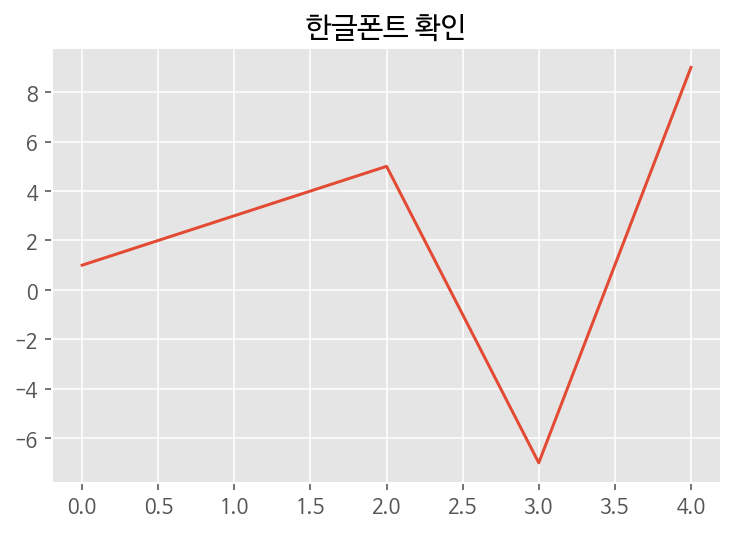

In [3]:
pd.Series([1, 3, 5, -7, 9]).plot(title="한글폰트 확인")

## 라이브러리 로드

In [4]:
# 주석을 풀고 설치해 주세요. 주석을 푸는 방법은 아래 코드의 맨 앞에 있는 #을 지워주시면 됩니다.
!pip install -U finance-datareader

In [5]:
import FinanceDataReader as fdr
fdr.__version__

'0.9.10'

## 전체 종목 가져오기
* 종목코드를 구하기 위해 전체 종목 가져오기

In [6]:
df_krx = fdr.StockListing('KRX')
df_krx.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,이현우,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


### seaborn 을 통한 빈도수 시각화

In [7]:
import seaborn as sns

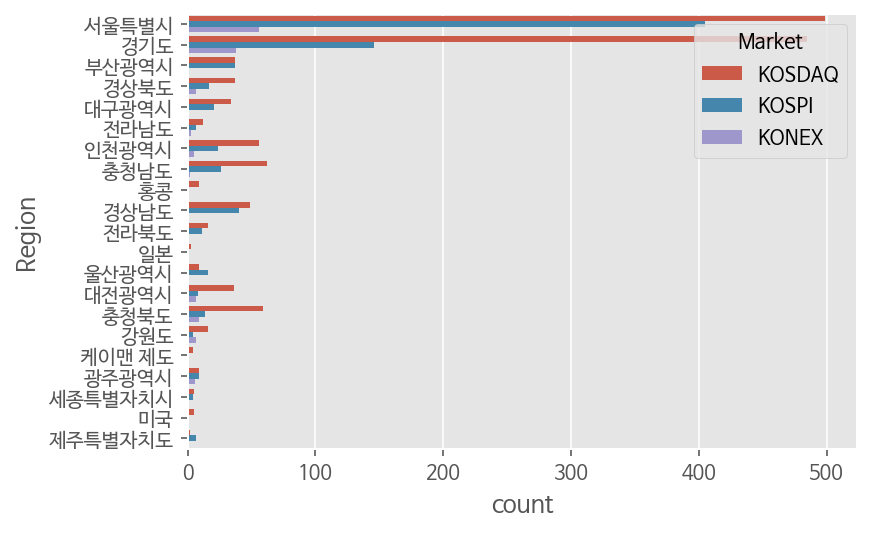

In [8]:
sns.countplot(data=df_krx, y="Region", hue="Market")

In [9]:
df_sub_region = df_krx[df_krx["Region"].isin(["서울특별시", "경기도", "인천광역시"])]

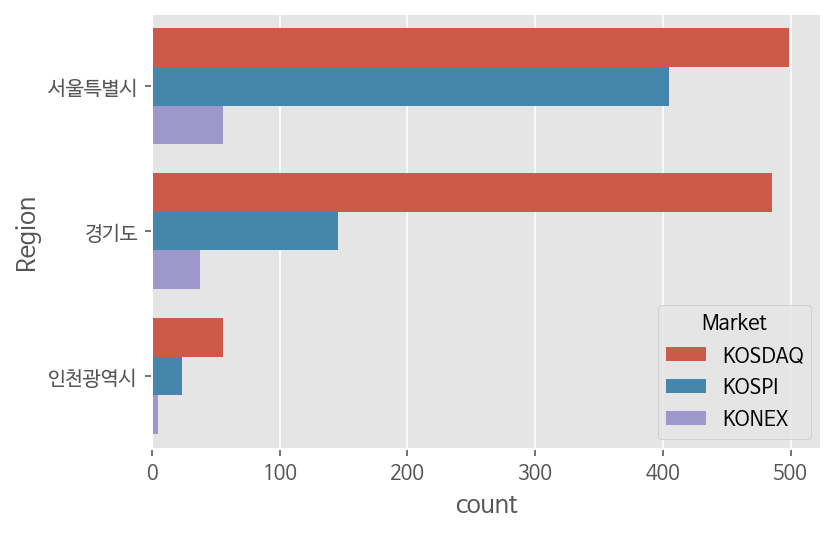

In [10]:
# 수도권에 있는 Region 별 Market 의 빈도수를 시각화 해보세요.
sns.countplot(data=df_sub_region, y="Region", hue="Market")

In [11]:
# 섹터별 지역을 시각화 해보세요

df_krx["Sector"].value_counts().head(20)

특수 목적용 기계 제조업                        140
소프트웨어 개발 및 공급업                       134
전자부품 제조업                             122
자동차 신품 부품 제조업                         96
의약품 제조업                               92
기타 금융업                                90
기타 화학제품 제조업                           87
금융 지원 서비스업                            75
통신 및 방송 장비 제조업                        72
반도체 제조업                               57
1차 철강 제조업                             57
자연과학 및 공학 연구개발업                       52
의료용 기기 제조업                            47
일반 목적용 기계 제조업                         44
플라스틱제품 제조업                            43
기초 화학물질 제조업                           42
기타 전문 도매업                             41
기초 의약물질 및 생물학적 제제 제조업                 38
컴퓨터 프로그래밍, 시스템 통합 및 관리업               35
전동기, 발전기 및 전기 변환 · 공급 · 제어 장치 제조업     33
Name: Sector, dtype: int64

In [13]:
df_sub_sector = df_krx[df_krx["Sector"] == "소프트웨어 개발 및 공급업"]
df_sub_sector.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
107,046440,KOSDAQ,KG모빌리언스,소프트웨어 개발 및 공급업,유무선전화결제서비스,2004-12-14,12월,곽재선,http://www.mobilians.co.kr,서울특별시
108,035600,KOSDAQ,KG이니시스,소프트웨어 개발 및 공급업,전자지불서비스,2002-11-22,12월,유승용,http://www.inicis.com,서울특별시
154,181710,KOSPI,NHN,소프트웨어 개발 및 공급업,한게임,2013-08-29,12월,정우진,http://www.nhn.com,경기도
155,104200,KOSDAQ,NHN벅스,소프트웨어 개발 및 공급업,"디지털음원유통, 온라인음악서비스",2009-10-06,12월,양주일,http://www.bugs.co.kr,경기도
179,950110,KOSDAQ,SBI핀테크솔루션즈,소프트웨어 개발 및 공급업,전자결제대행 및 핀테크 비스,2012-12-17,03월,카네코 유이치,http://https://www.sbi-finsol.co.jp/kr/,일본


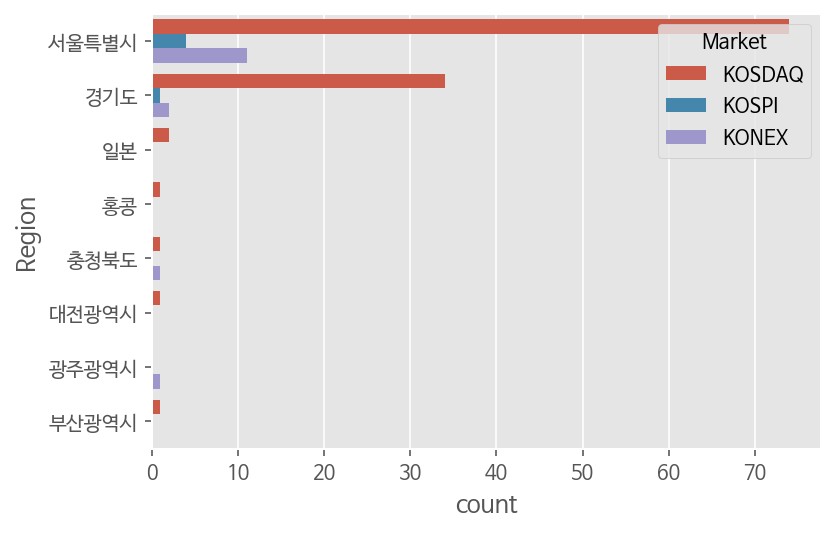

In [14]:
sns.countplot(data=df_sub_sector, y="Region", hue="Market")

## 주가 이름으로 종목 데이터 받아오기

In [15]:
# 주가 이름으로 종목코드 받아오는 함수 만들기
def item_code_by_item_name(item_name):
    name_list = df_krx.loc[df_krx["Name"] == item_name, "Symbol"].tolist()
    if len(name_list) > 0 :
        item_code = name_list[0]
        return item_code
    else:
        return False

In [16]:
# 종목명으로 일별 시세 수집
def find_item_list(item_name, year=2020):
    item_code = item_code_by_item_name(item_name)
    df = fdr.DataReader(item_code, str(year))
    return df

## 개별종목 일별시세 가져오기

In [17]:
카카오 = find_item_list("카카오")
카카오.head(2)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,154000,154500,152000,152500,241047,-0.006515
2020-01-03,153500,155000,151000,152500,314848,0.000000


In [18]:
씨젠 = find_item_list("씨젠")
씨젠.head(2)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,30650,31150,30150,30950,152379,0.009788
2020-01-03,31100,31750,30950,31500,272230,0.017771


In [19]:
신풍제약 = find_item_list("신풍제약")
신풍제약.head(2)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,7330,7410,7160,7320,649218,0.011050
2020-01-03,7320,7370,7170,7230,416141,-0.012295


In [20]:
현대차 = find_item_list("현대차")
현대차.head(2)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,121000,121000,118000,118000,556532,-0.020747
2020-01-03,118500,119000,115000,116000,1145187,-0.016949


## 판다스 내장 plot 으로 그리기

In [21]:
ohlc_col = ['Open', 'High', 'Low', 'Close']
ohlc_col

['Open', 'High', 'Low', 'Close']

In [22]:
카카오[ohlc_col].head()

,Open,High,Low,Close
Date,,,,
2020-01-02,154000,154500,152000,152500
2020-01-03,153500,155000,151000,152500
2020-01-06,150500,155000,150000,154500
2020-01-07,155000,160000,154500,160000
2020-01-08,158500,162000,156500,159500


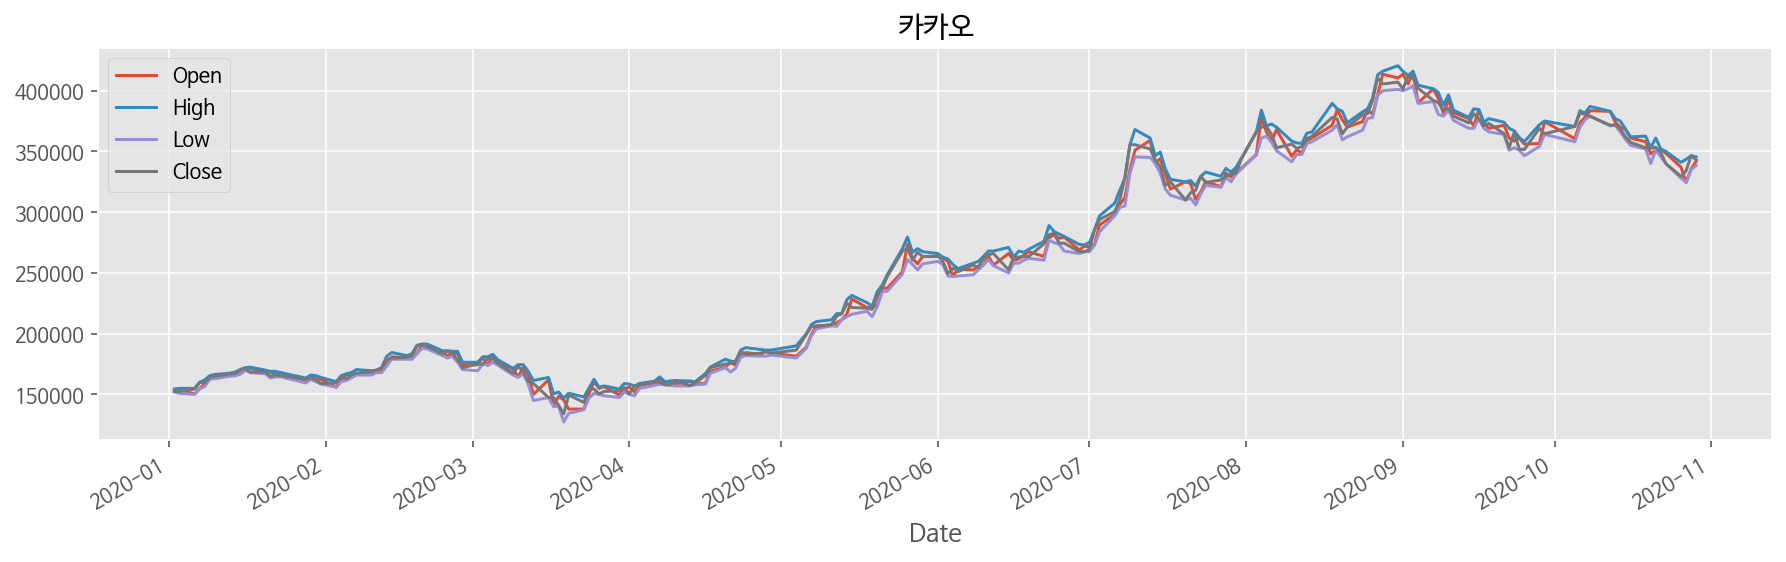

In [23]:
카카오[ohlc_col].plot(figsize=(15, 4), title="카카오")

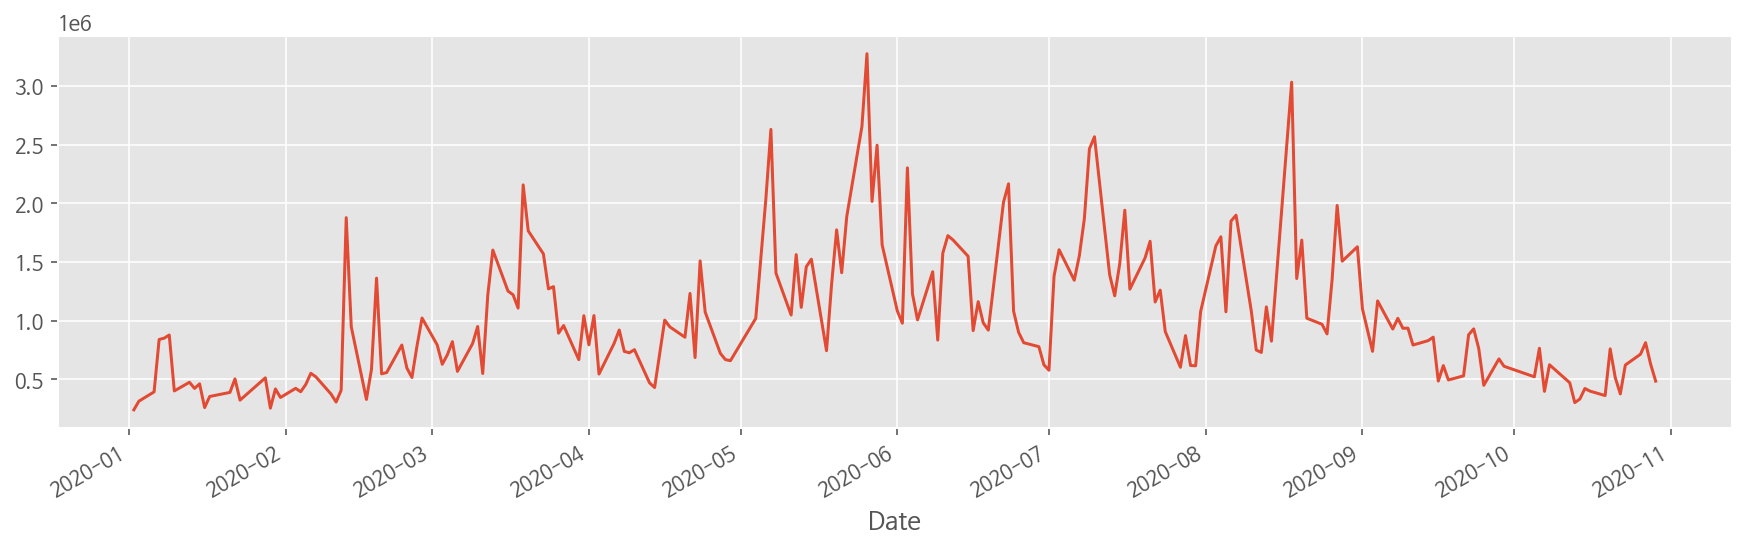

In [24]:
카카오["Volume"].plot(figsize=(15, 4))

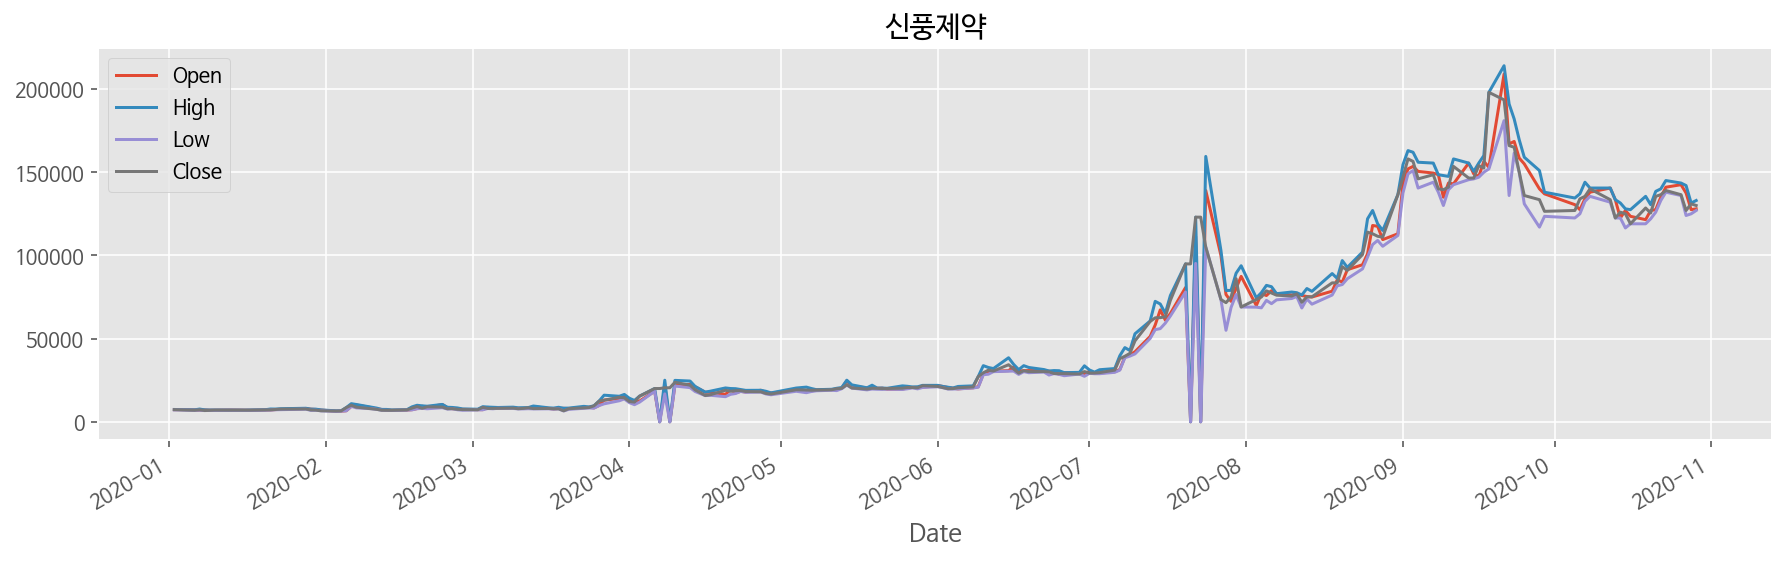

In [25]:
신풍제약[ohlc_col].plot(figsize=(15, 4), title="신풍제약")

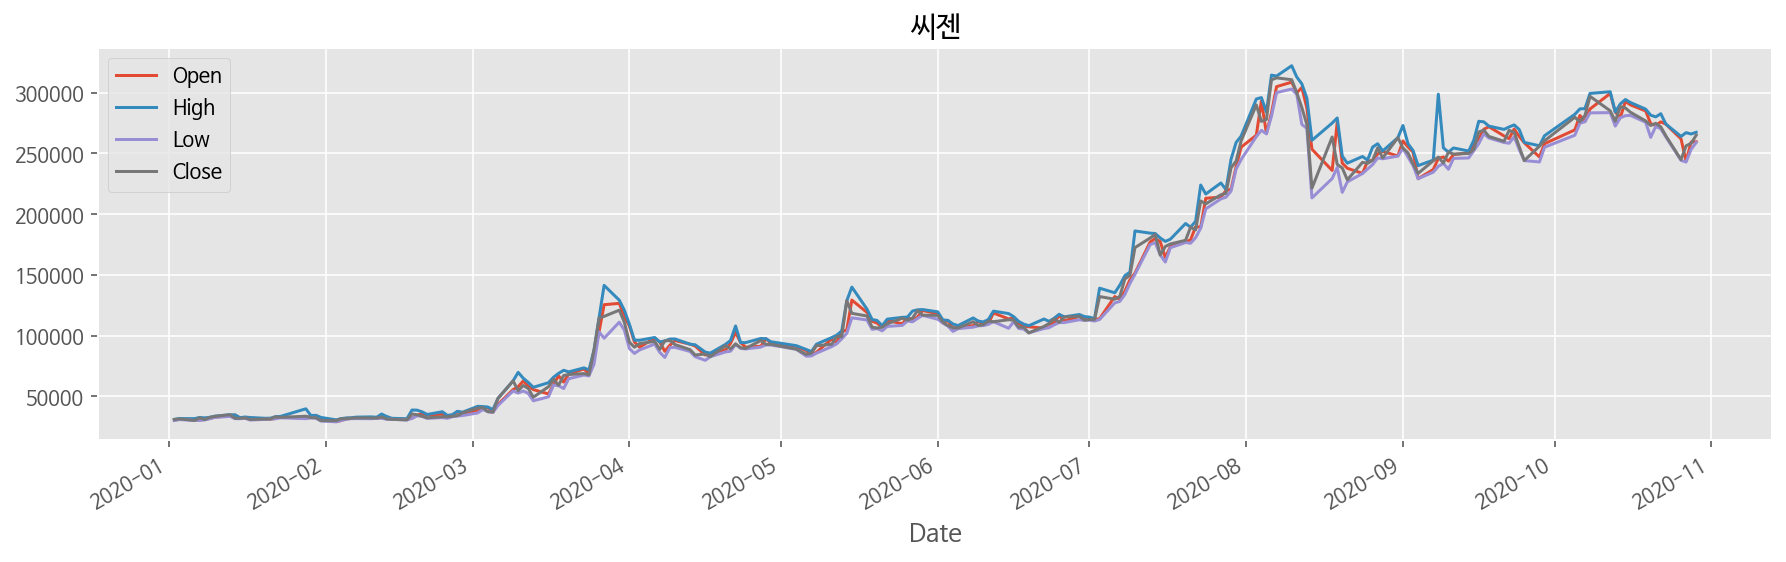

In [26]:
씨젠[ohlc_col].plot(figsize=(15, 4), title="씨젠")

## mplfinace

* https://github.com/matplotlib/mplfinance

In [27]:
!pip install --upgrade mplfinance

     |████████████████████████████████| 61kB 2.2MB/s 


In [28]:
import mplfinance as mpf

mpf.__version__

'0.12.7a0'

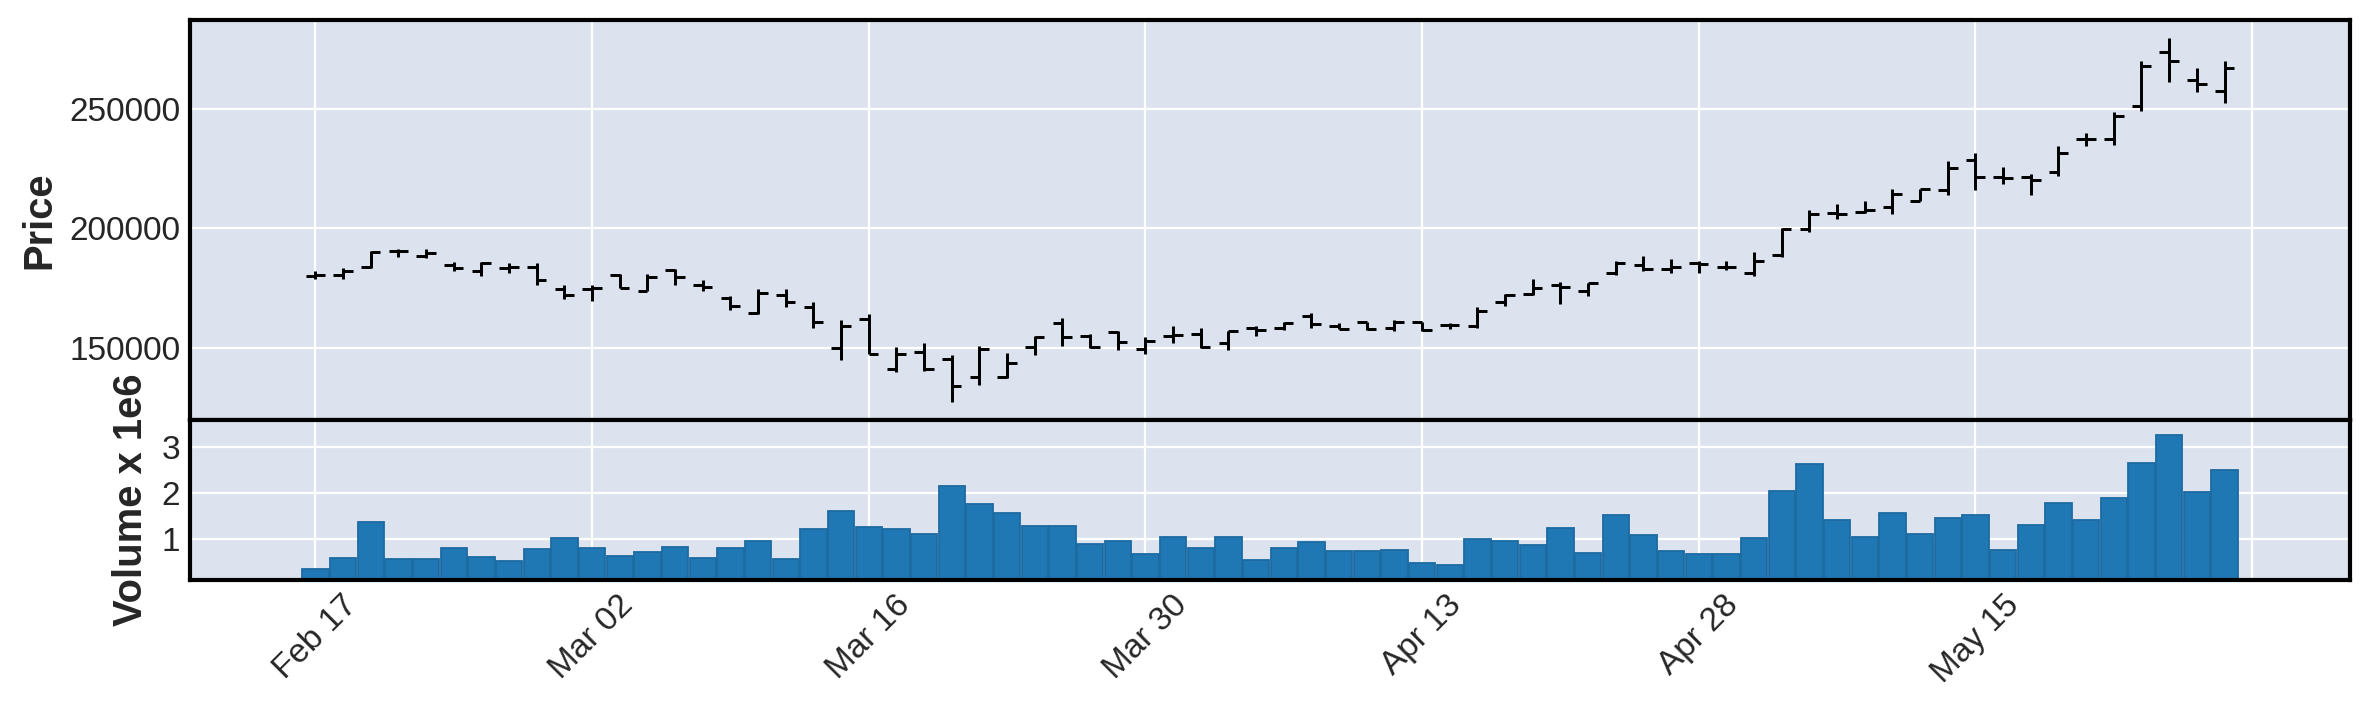

In [32]:
mpf.plot(카카오[30:100], figsize=(15, 4), volume=True)

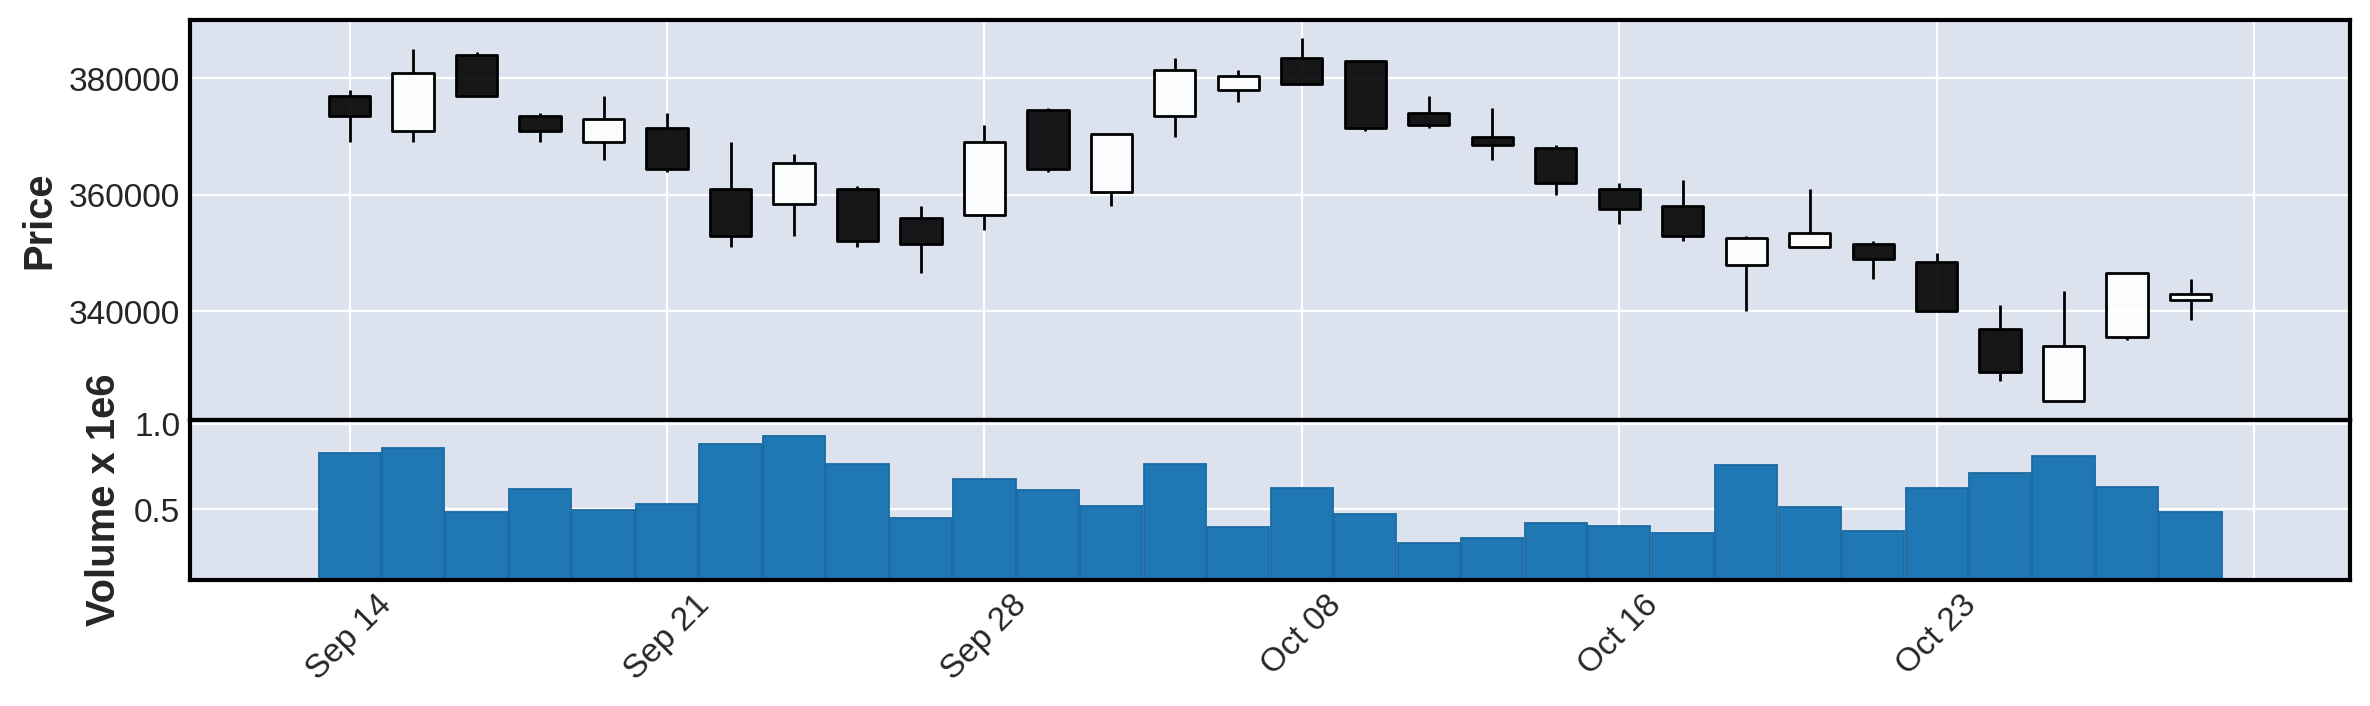

In [33]:
mpf.plot(카카오[-30:], figsize=(15, 4), type='candle', volume=True)

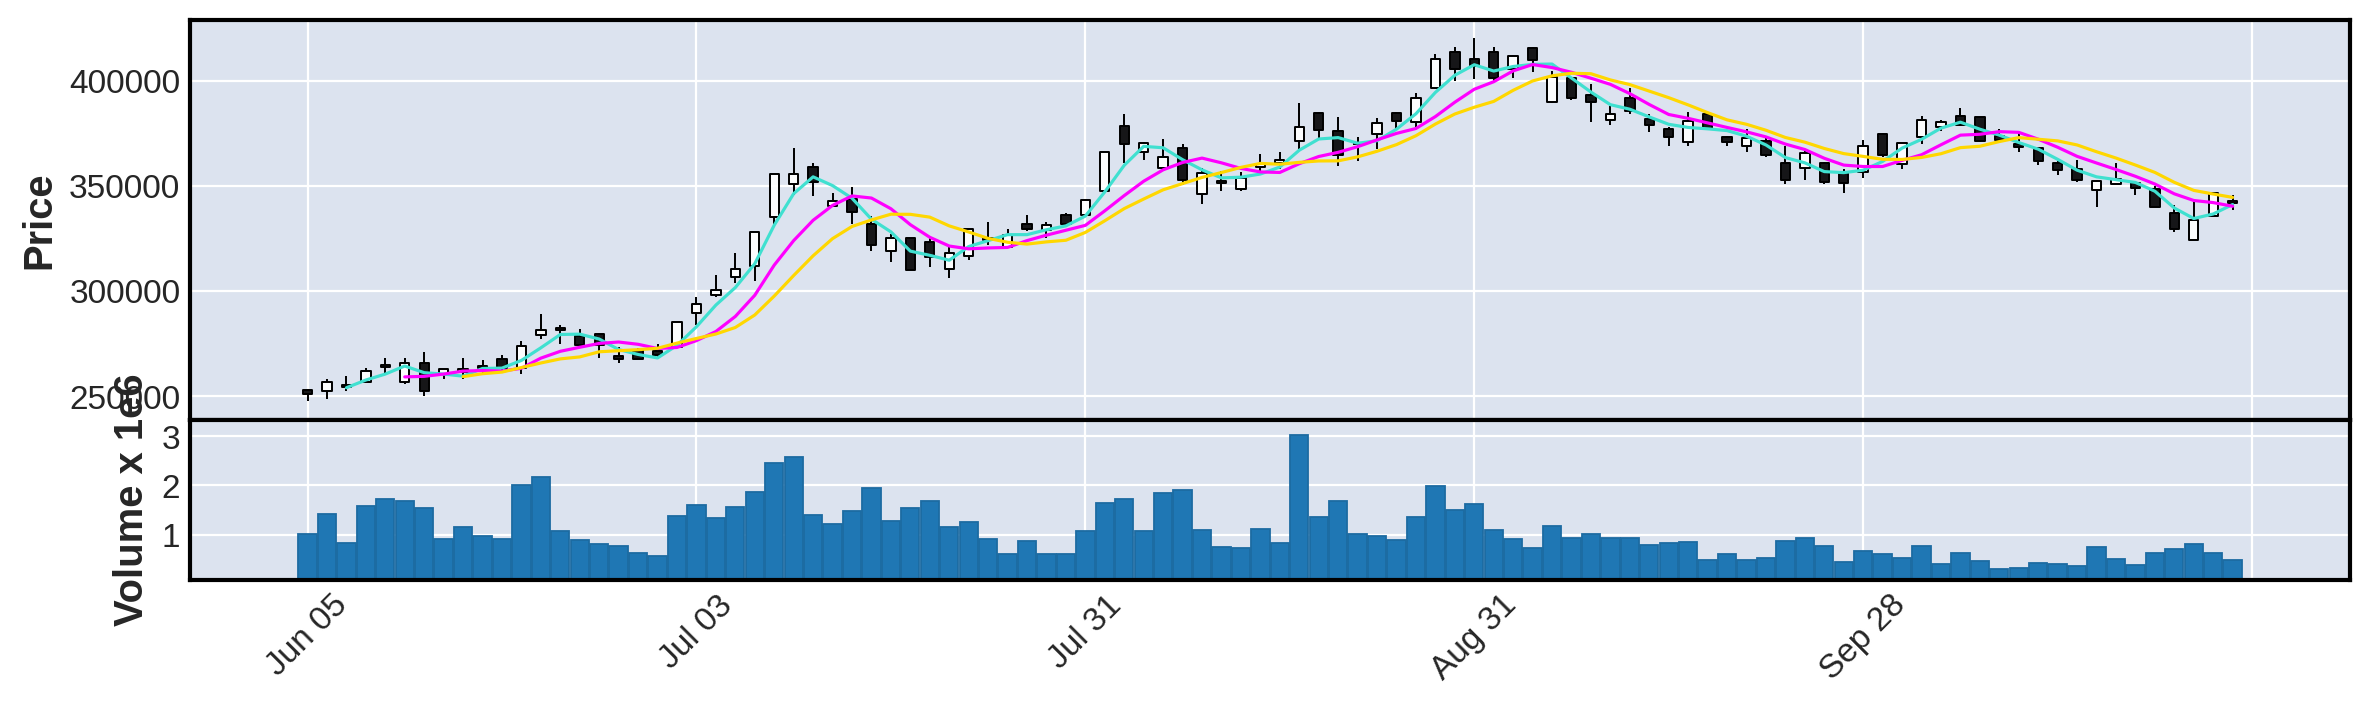

In [34]:
mpf.plot(카카오[-100:], type='candle', mav=(3,6,9), figsize=(15, 4), volume=True)

## 볼린저 밴드

볼린저 밴드(Bollinger Bands)는 1980년대 존 볼린저가 개발하고 2011년 상표권 취득한 주가 기술적 분석 도구이다. 트레이딩 밴드 개념에서 발전된 볼린저 밴드와 상대지표 그리고 대역폭은 이전 거래와의 상대적 가격의 높음과 낮음을 판단하는 데 사용된다. 볼린저 밴드는 켈트너 채널과 비슷한 변동성 지표이다. 볼린저 밴드는 주가가 이동평균선 중심으로 표준편차 범위 안에서 움직인다는 전제로 개발되었다


볼린저 밴드는 다음과 같이 구성된다.
* N기간 동안의 이동평균(MA)
* 이동평균 위의 K배 표준편차 상위 밴드
* 이동평균 아래의 K배 표준편차 하위 밴드

일반적으로 N과 K의 값은 20과 2이다. 평균값의 기본 선택의 단순 이동 평균이지만, 필요에 따라 다른 종류의 평균값을 쓸 수 있다. 지수 이동 평균(Exponential moving averages)은 일반적인 대안이다. 대개 중간 밴드와 표준 편차의 계산을 위해 같은 기간을 사용한다.



* 출처 : https://ko.wikipedia.org/wiki/%EB%B3%BC%EB%A6%B0%EC%A0%80_%EB%B0%B4%EB%93%9C

In [35]:
def show_bband(df):
    """
    볼린저 밴드
    N기간 동안의 이동평균(MA)
    이동평균 위의 K배 표준편차 상위 밴드
    이동평균 아래의 K배 표준편차 하위 밴드
    일반적으로 N과 K의 값은 20과 2
    """
    plt.style.use("seaborn-whitegrid")
    df['MA20'] = df['Close'].rolling(window=20).mean()
    df['stddev'] = df['Close'].rolling(window=20).std()
    df['upper'] = df['MA20'] + (df['stddev'] * 2)
    df['lower'] = df['MA20'] - (df['stddev'] * 2)
    df = df[19:].copy()
    
    plt.figure(figsize=(9, 5))
    plt.plot(df.index, df['Close'], color='#0000ff', label='Close')
    plt.plot(df.index, df['upper'], 'r--', label = 'Upper band')
    plt.plot(df.index, df['MA20'], 'k:', label='Moving average 20')
    plt.plot(df.index, df['lower'], 'c--', label = 'Lower band')
    plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')
    plt.legend(loc='best')
    plt.title('Bollinger Band (20 day, 2 std)')
    plt.show()

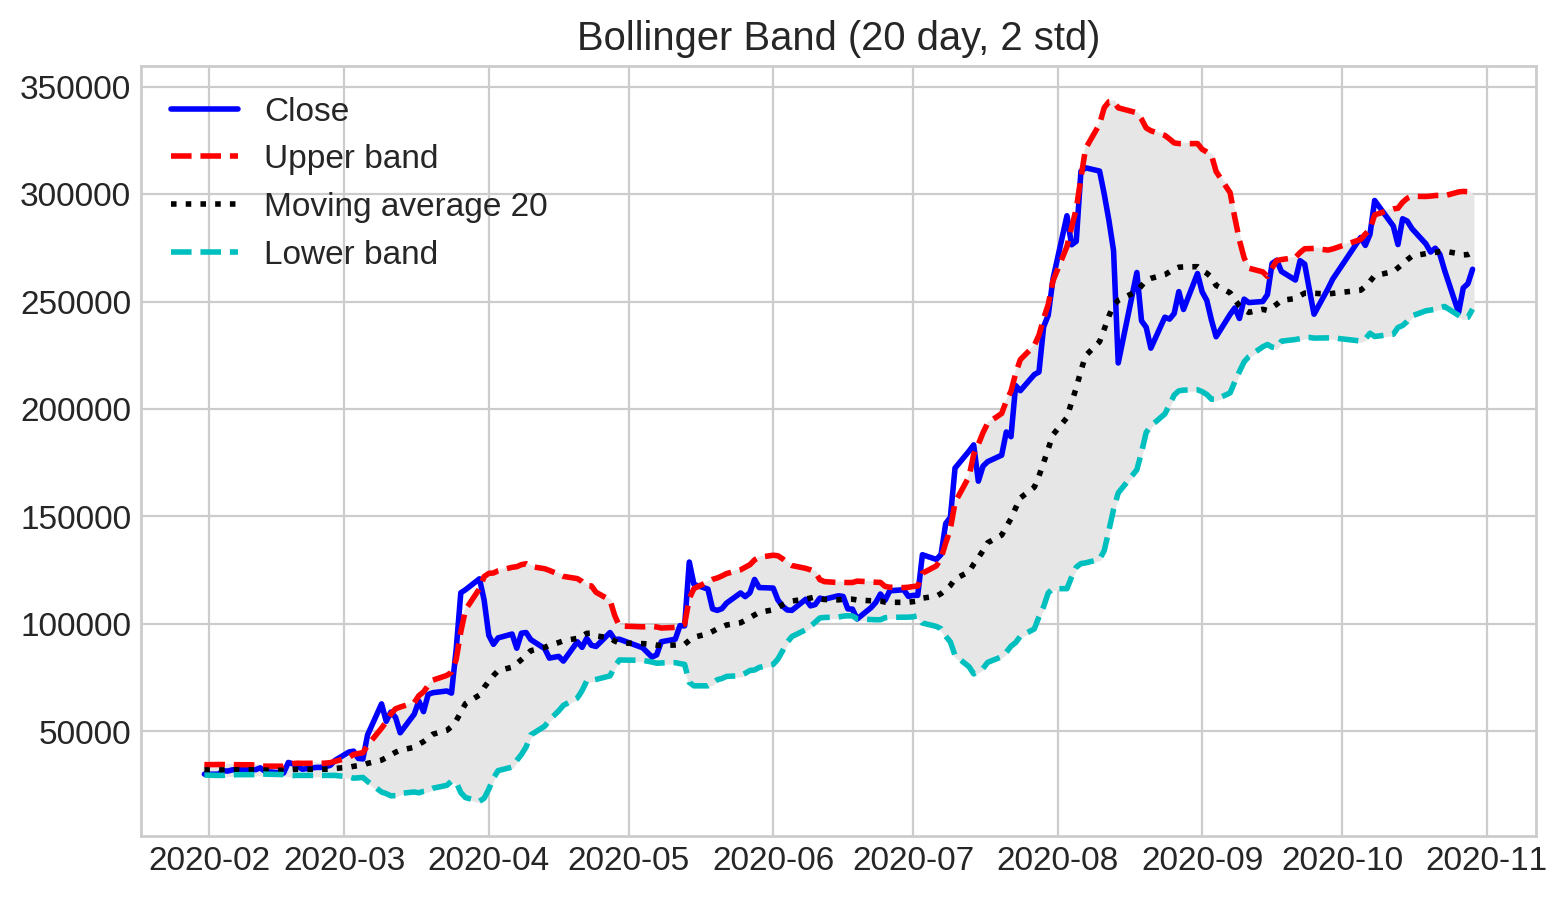

In [37]:
show_bband(씨젠)